# Introduction to Decision Trees

Agenda:

- `01_intro_and_pruning.ipynb` (This notebook)
    - Anatomy of a Tree
    - Critical shortcoming of decision trees
    - Pruning a Tree
    - Bias vs. Variance and Cross Validation
-

By the end of the hour you should be able to answer: *"Why do Random Forests and Gradiant Boosted Trees Exist?"*

# Lets GO!

### Tree Anatomy 🌳

In reality this tree would be very simple. But PRETEND I'm proficient at golfing. I have kept a record of all my rounds of golf for many years. I recorded my score as above/under par, if I walked or used a golf cart, if it was windy, if it was cold, and if I was golfing with friends. Based on that data, I'll use a simple decision tree to predict whether or not I'll score above or under par on my next round.

We start with the split that reduces impurity the most. Quick definition of Gini Impurity from [wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity): Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. 

The Gini impurity can be computed by summing the probability $p_i$ of an item with label $i$ being chosen times the probability of a mistake in categorizing that item, defined as:

$${\displaystyle \sum _{k\neq i}p_{k}=1-p_{i}}$$

It reaches its minimum (zero) when all cases in the node fall into a single target category. If I was building a model based on my REAL golf stats the split would be quite easy. Is Scott the golfer? If "Yes" -> above par. Gini impurity would equal a cool zero and we'd be done. 

#### Vocabulary
**Root Node:** This is the feature split first, this feature should reduce impurity the most. In this case, whether or not I'm golfing with friends is the best single predictor of how I do. So we start with that.

**Decision Nodes:** These are the subsequent splits. Notice the wind doesn't appear if I'm golfing alone, and walk or cart doesn't appear if I'm golfing with friends.

**Leaf Nodes:** These are the final outcomes, predictions of the target variable. We'll talk about what determines when we've reached a leaf node.

<img src="../images/tree_graphic.jpg" width="800">

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

sns.set(rc={'figure.figsize':(7.5,5)})

### Load Iris Dataset

In [2]:
data = datasets.load_iris()

iris = pd.DataFrame(data['data'], columns=data['feature_names'])
iris['target'] = data['target']
iris = iris.assign(species=lambda x: x['target'].map(dict(enumerate(data['target_names']))))

# Shuffle dataset and print first 5 rows
iris.sample(frac=1, random_state=32).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
55,5.7,2.8,4.5,1.3,1,versicolor
22,4.6,3.6,1.0,0.2,0,setosa
26,5.0,3.4,1.6,0.4,0,setosa
56,6.3,3.3,4.7,1.6,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica


In [3]:
iris.groupby(['target', 'species']).median()

,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,species,,,,
0,setosa,5.0,3.4,1.50,0.2
1,versicolor,5.9,2.8,4.35,1.3
2,virginica,6.5,3.0,5.55,2.0


### Plot Sepal and Petal Shapes

<img src="../images/iris.png" width="800">

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

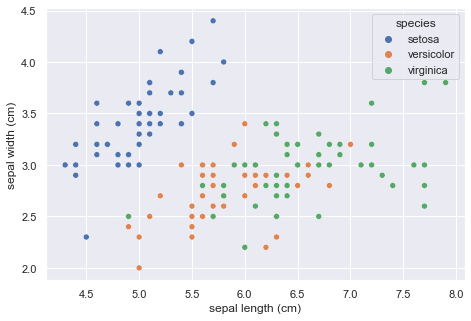

In [4]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='species')

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

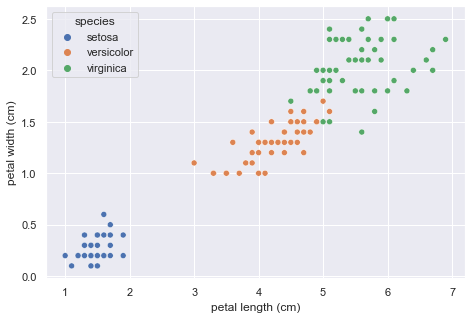

In [5]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris, hue='species')

### Decision Trees are Cool BUT...
They quickly overfit if we don't know what we're doing

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris[['sepal length (cm)', 'sepal width (cm)']].to_numpy(),
    iris[['target']].to_numpy(),
    test_size=0.1, random_state=32
)

Import a function to plot the decision boundary train/test points

In [7]:
from modeling_helper import dt_plot_surface

### Train a model!

🛑 STOP! What's wrong?

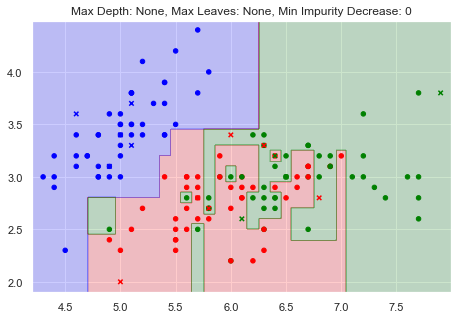

^^^ Train accuracy: 0.94, Test accuracy: 0.6 ^^^


In [8]:
dt_plot_surface(X_train, X_test, y_train, y_test)

### Pruning

#### Max Depth

The tree grows until we reach the max depth limit. The lower the number, the less decision boundaries you will have.

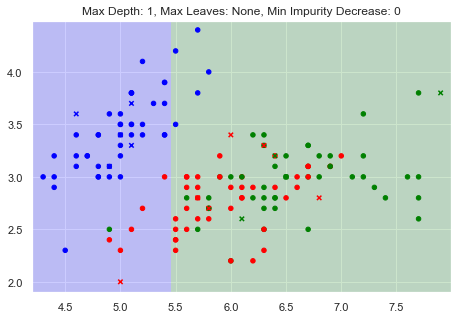

^^^ Train accuracy: 0.63, Test accuracy: 0.6 ^^^


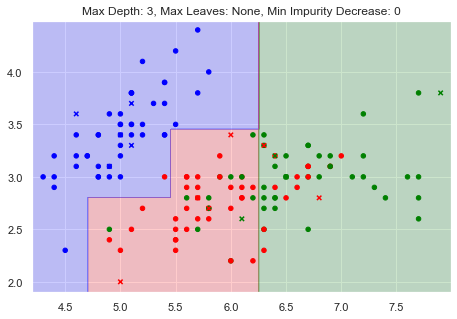

^^^ Train accuracy: 0.81, Test accuracy: 0.8 ^^^


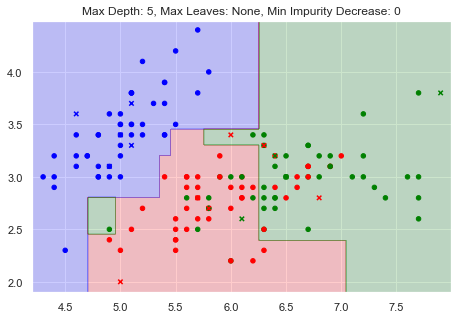

^^^ Train accuracy: 0.84, Test accuracy: 0.73 ^^^


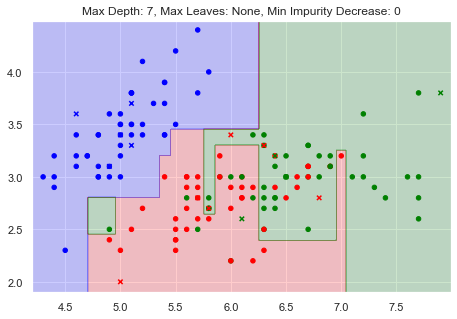

^^^ Train accuracy: 0.87, Test accuracy: 0.67 ^^^


In [9]:
for depth in [1, 3, 5, 7]:
    dt_plot_surface(X_train, X_test, y_train, y_test, max_depth=depth)

#### Max Leaves

The tree grows until we reach the max leaf limit. The fewer nodes allowed, the less decision boundaries your tree will create. Trees are grown with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

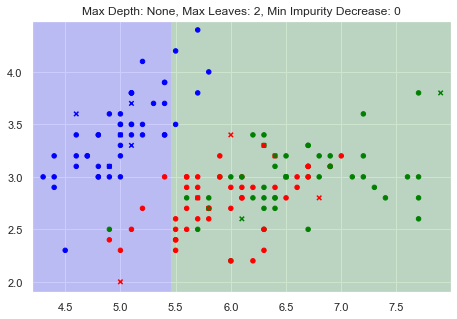

^^^ Train accuracy: 0.63, Test accuracy: 0.6 ^^^


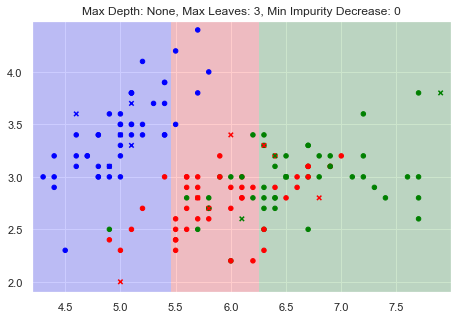

^^^ Train accuracy: 0.75, Test accuracy: 0.73 ^^^


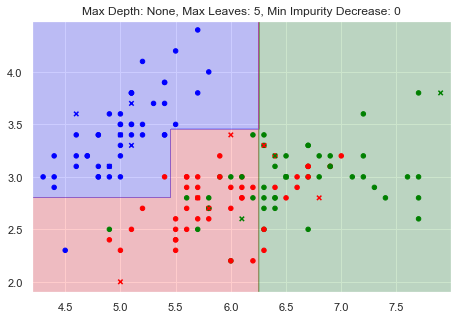

^^^ Train accuracy: 0.81, Test accuracy: 0.8 ^^^


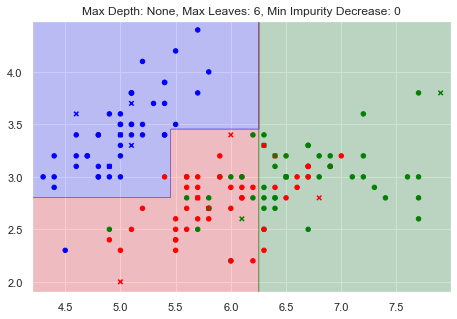

^^^ Train accuracy: 0.81, Test accuracy: 0.8 ^^^


In [10]:
for nodes in [2, 3, 5, 6]:
    dt_plot_surface(X_train, X_test, y_train, y_test, max_leaf_nodes=nodes)

#### Minimum Impurity Decrease

The definition of impurity is out of scope for this quick course but central to understanding Decision Trees. [This](https://www.youtube.com/watch?v=7VeUPuFGJHk&t=426s) is a great intro to gini impurity, the default used with sklearn's `DecisionTreeClassifier`. With this parameter, the tree is only allowed to grow if a node decreases the impurity greater than or equal to this value. The higher the number, the higher the threshold is to create splits so less decision boundaries will be created.

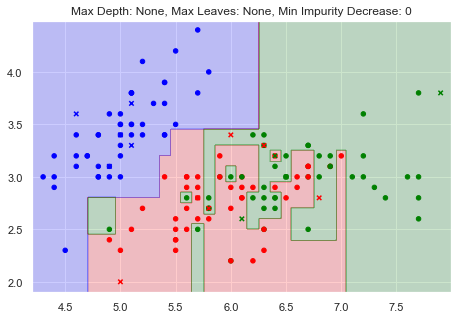

^^^ Train accuracy: 0.94, Test accuracy: 0.6 ^^^


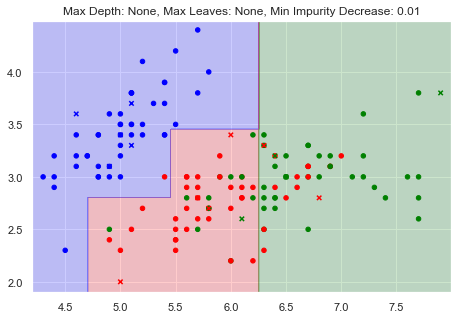

^^^ Train accuracy: 0.81, Test accuracy: 0.8 ^^^


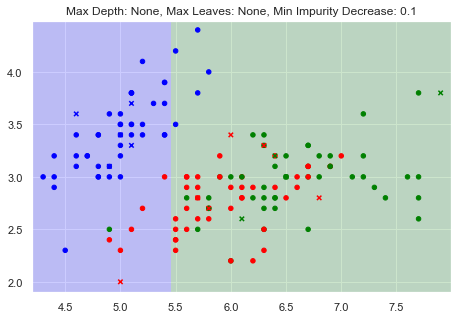

^^^ Train accuracy: 0.63, Test accuracy: 0.6 ^^^


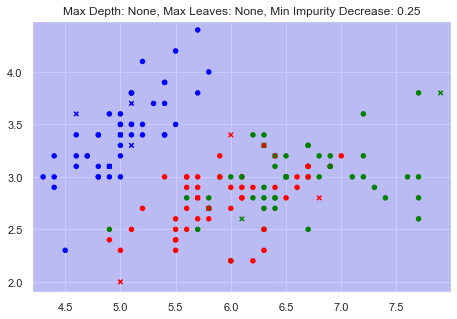

^^^ Train accuracy: 0.34, Test accuracy: 0.27 ^^^


In [11]:
for depth in [0, .01, .1, .25]:
    dt_plot_surface(X_train, X_test, y_train, y_test, min_impurity_decrease=depth)

### Bias vs. Variance Tradeoff

My favorite [source](https://mlu-explain.github.io/bias-variance/) for jogging my memory on this concept.

I like to think of it like this: We're always going to have error. Error comes from three places, bias, variance, and noise. We can’t do much about the noise, but we can make use of the relationship between both bias and variance to obtain better predictions. Neither of the models below will generalize well, but the fail to genearalize for different reasons.

**Bias:** Represents the difference between the average prediction and the true value. For underfit (low-complexity) models, the majority of our error comes from bias. The error here would largely come from the model's high bias.

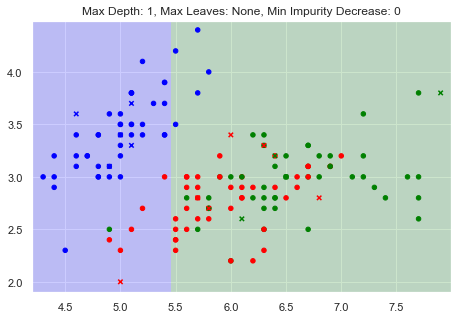

^^^ Train accuracy: 0.63, Test accuracy: 0.6 ^^^


In [12]:
dt_plot_surface(X_train, X_test, y_train, y_test, max_depth=1)

**Variance:** Variance measures how much, on average, predictions vary for a given data point. The error here would largely come from the model's high variance, it has very low bias.

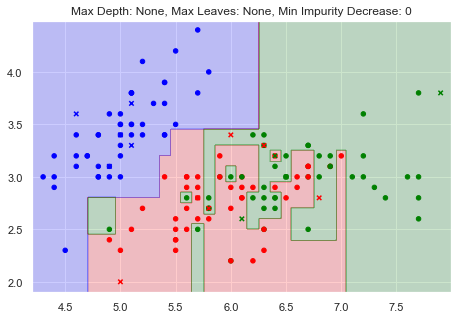

^^^ Train accuracy: 0.94, Test accuracy: 0.6 ^^^


In [13]:
dt_plot_surface(X_train, X_test, y_train, y_test, max_depth=None)

### Cross Validation: What's the best tree?

(Still copying from Jared's walkthrough)

To obtain our best results, we should work to find a happy medium between a model that is so basic it fails to learn meaningful patterns in our data, and one that is so complex it fails to generalize to unseen data.

In other words, we don’t want an underfit model, but we don’t want an overfit model either. We want something in between - something with enough complexity to learn learn the generalizable patterns in our data. 

By trading some bias for variance (i.e. increasing the complexity of our model), and without going overboard, we can find a balanced model for our dataset.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

cv_params = {
    'max_depth': [1, 3, 5, 7],
    'max_leaf_nodes': [2, 3, 6],
    'min_impurity_decrease': [0, .01, .1, .25]
}

In [15]:
grid_search = GridSearchCV(model, param_grid=cv_params)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7], 'max_leaf_nodes': [2, 3, 6],
                         'min_impurity_decrease': [0, 0.01, 0.1, 0.25]})

In [16]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0}


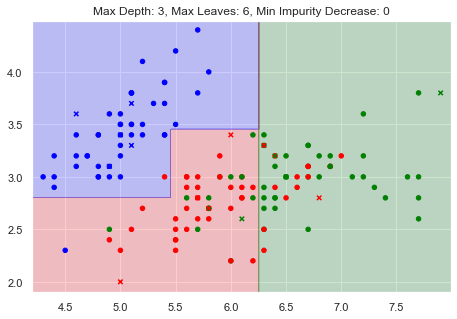

^^^ Train accuracy: 0.81, Test accuracy: 0.8 ^^^


In [17]:
dt_plot_surface(
    X_train, X_test, y_train, y_test,
    max_depth=grid_search.best_params_['max_depth'],
    max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],
    min_impurity_decrease=grid_search.best_params_['min_impurity_decrease']
)

## This search for a happy medium is the topic of the rest of the tutorial!!